In [ ]:
import os
import json

# Get the metrics from each of the checkpoint files in the directory
def get_metrics_from_checkpoints(directory, verbose=True):
    train_metrics = {}
    val_metrics = {}

    # Sort the checkpoint directories numerically
    checkpoint_dirs = sorted(
        [d for d in os.listdir(directory) if d.startswith("checkpoint-")],
        key=lambda x: int(x.split('-')[1])
    )
    for filename in checkpoint_dirs:
        if verbose:
            print(f"Processing {filename}")
        file = json.load(open(os.path.join(directory, f"{filename}/trainer_state.json")))
        temp_train_metrics = file['log_history'][-2]
        temp_val_metrics = file['log_history'][-1]

        for key, value in temp_val_metrics.items():
            if key not in val_metrics:
                val_metrics[key] = []
            val_metrics[key].append(value)

        for key, value in temp_train_metrics.items():
            if key not in train_metrics:
                train_metrics[key] = []
            train_metrics[key].append(value)

    return train_metrics, val_metrics

train_data, val_data = get_metrics_from_checkpoints("D20_Experiment") # Folder containing the checkpoints

Processing checkpoint-2161
Processing checkpoint-4322
Processing checkpoint-6483
Processing checkpoint-8644
Processing checkpoint-10805
Processing checkpoint-12966
Processing checkpoint-15127
Processing checkpoint-17288
Processing checkpoint-19449
Processing checkpoint-21610
Processing checkpoint-23771
Processing checkpoint-25932
Processing checkpoint-28093
Processing checkpoint-30254
Processing checkpoint-32415
Processing checkpoint-34576
Processing checkpoint-36737
Processing checkpoint-38898
Processing checkpoint-41059
Processing checkpoint-43220
Processing checkpoint-45381
Processing checkpoint-47542
Processing checkpoint-49703
Processing checkpoint-51864
Processing checkpoint-54025
Processing checkpoint-56186
Processing checkpoint-58347
Processing checkpoint-60508
Processing checkpoint-62669
Processing checkpoint-64830
Processing checkpoint-66991
Processing checkpoint-69152
Processing checkpoint-71313
Processing checkpoint-73474
Processing checkpoint-75635
Processing checkpoint-77

In [2]:
train_data.keys()  

dict_keys(['epoch', 'grad_norm', 'learning_rate', 'loss', 'step'])

In [3]:
val_data.keys()  

dict_keys(['epoch', 'eval_accuracy_branch1', 'eval_accuracy_branch2', 'eval_f1_branch1', 'eval_f1_branch2', 'eval_lambda', 'eval_loss', 'eval_precision_branch1', 'eval_precision_branch2', 'eval_recall_branch1', 'eval_recall_branch2', 'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second', 'step'])

In [4]:
train_loss = train_data['loss']
val_loss = val_data['eval_loss']

print(train_loss)
print(val_loss)

[1.0816, 1.3213, 2.2737, 3.7373, 5.6449, 6.0159, 7.1443, 9.1334, 10.7006, 10.8873, 12.3831, 10.7443, 13.45, 15.9263, 14.6902, 14.8479, 14.2997, 15.5127, 14.4166, 14.0869, 13.889, 15.0447, 12.7209, 11.9155, 12.7114, 11.0561, 10.2185, 10.3776, 10.2115, 10.6801, 9.7762, 8.736, 7.9987, 8.1924, 5.8478, 6.9373, 5.8046, 4.8585, 4.9753, 4.5539, 3.8076, 3.5746, 3.2163, 2.7052, 2.3591, 2.0034, 1.5979, 1.2382, 0.9379, 1.0789]
[0.9137243032455444, 0.6665210723876953, 2.4949676990509033, 1.7580205202102661, 0.27367860078811646, 7.905060768127441, 0.4216004014015198, 8.7166748046875, 6.000146865844727, 16.727073669433594, 14.495854377746582, 13.442672729492188, 2.106220006942749, 11.332422256469727, 11.722797393798828, 17.32428550720215, 16.785484313964844, 5.241456985473633, 4.169754505157471, 4.515312671661377, 5.412342071533203, 2.640620470046997, 14.884848594665527, 10.056255340576172, 23.811649322509766, 8.135137557983398, 6.0525102615356445, 1.1607005596160889, 15.27912712097168, 0.66327875852

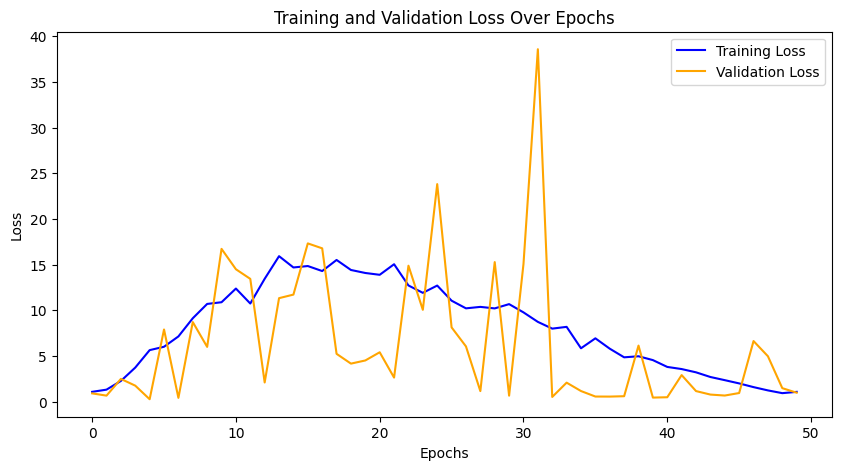

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()


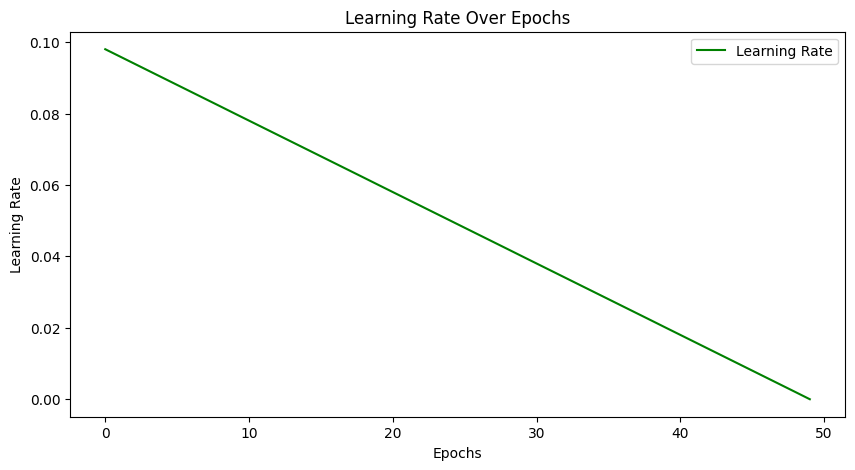

In [6]:
learningrate = train_data['learning_rate']
plt.figure(figsize=(10, 5)) 
plt.plot(learningrate, label='Learning Rate', color='green')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Over Epochs')
plt.legend()

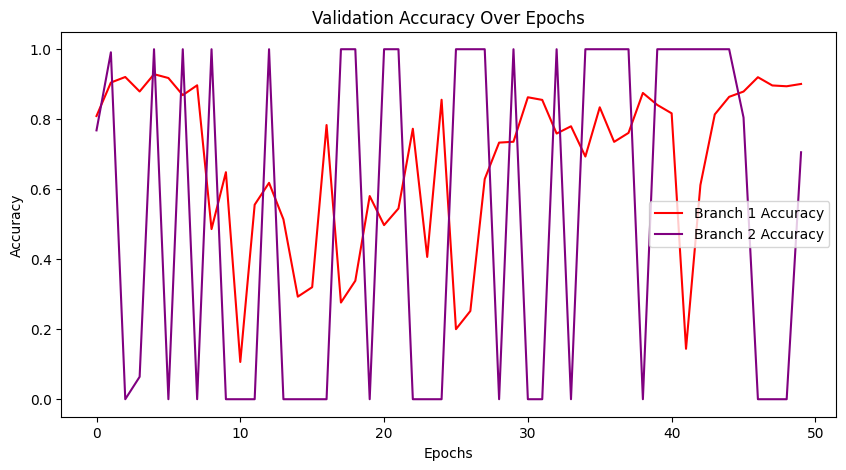

In [7]:
acc1 = val_data['eval_accuracy_branch1']
acc2 = val_data['eval_accuracy_branch2']

plt.figure(figsize=(10, 5))
plt.plot(acc1, label='Branch 1 Accuracy', color='red')
plt.plot(acc2, label='Branch 2 Accuracy', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.legend()

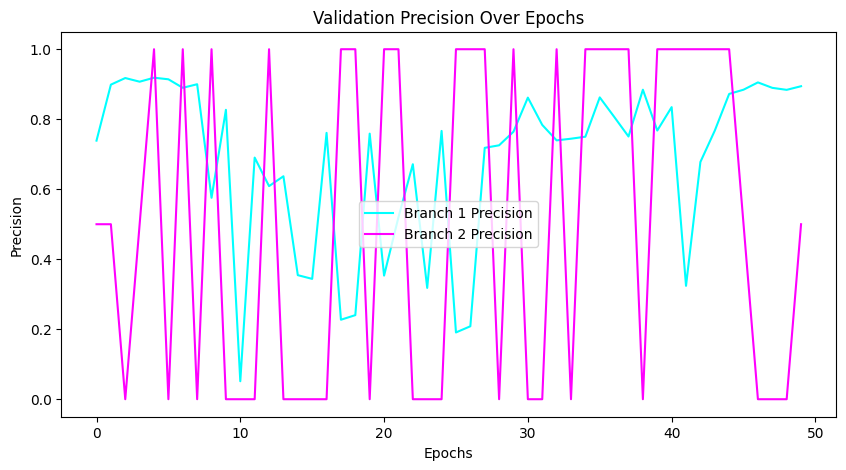

In [8]:
prec1 = val_data['eval_precision_branch1']
prec2 = val_data['eval_precision_branch2']

plt.figure(figsize=(10, 5))
plt.plot(prec1, label='Branch 1 Precision', color='cyan')
plt.plot(prec2, label='Branch 2 Precision', color='magenta')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Validation Precision Over Epochs')
plt.legend()

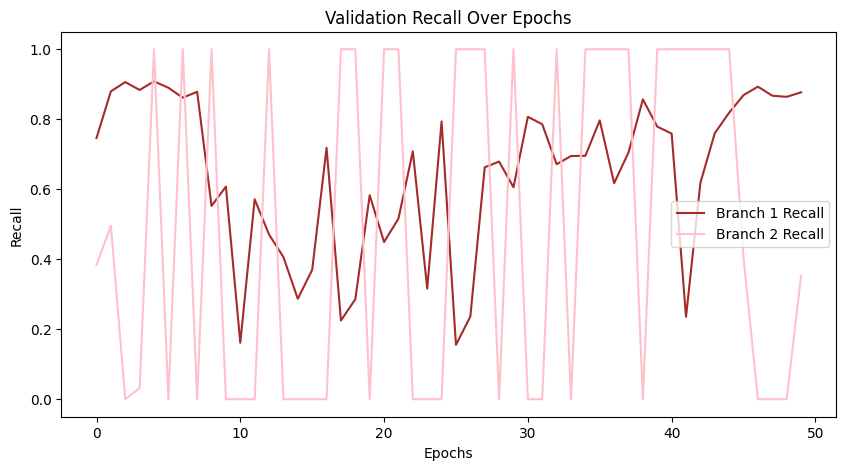

In [9]:
recall1 = val_data['eval_recall_branch1']
recall2 = val_data['eval_recall_branch2']

plt.figure(figsize=(10, 5))
plt.plot(recall1, label='Branch 1 Recall', color='brown')
plt.plot(recall2, label='Branch 2 Recall', color='pink')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Validation Recall Over Epochs')
plt.legend()


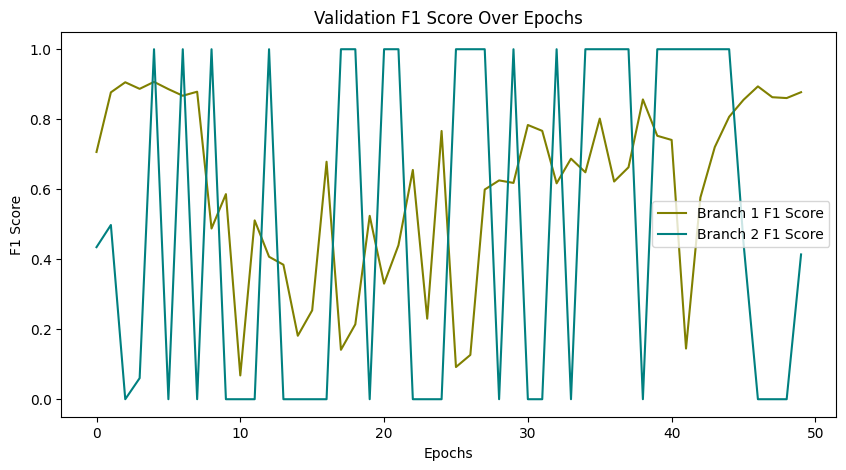

In [10]:
f1_1 = val_data['eval_f1_branch1']
f1_2 = val_data['eval_f1_branch2']

plt.figure(figsize=(10, 5))
plt.plot(f1_1, label='Branch 1 F1 Score', color='olive')
plt.plot(f1_2, label='Branch 2 F1 Score', color='teal')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Validation F1 Score Over Epochs')
plt.legend()